In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [55]:
water_data = pd.read_csv("data/water_potability.csv")
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## **Analise de dados faltantes**

In [56]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [57]:
round((water_data.isnull().sum()/water_data.shape[0])*100, 2)

ph                 14.99
Hardness            0.00
Solids              0.00
Chloramines         0.00
Sulfate            23.84
Conductivity        0.00
Organic_carbon      0.00
Trihalomethanes     4.95
Turbidity           0.00
Potability          0.00
dtype: float64

In [58]:
water_data.drop(columns=["Sulfate"],inplace = True) # removida coluna Sulfate
water_data.fillna({"ph":water_data.ph.mean(),"Trihalomethanes":water_data.Trihalomethanes.mean()},inplace = True) # Preenchido com a média
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## *Analise de outliers* 

<AxesSubplot: >

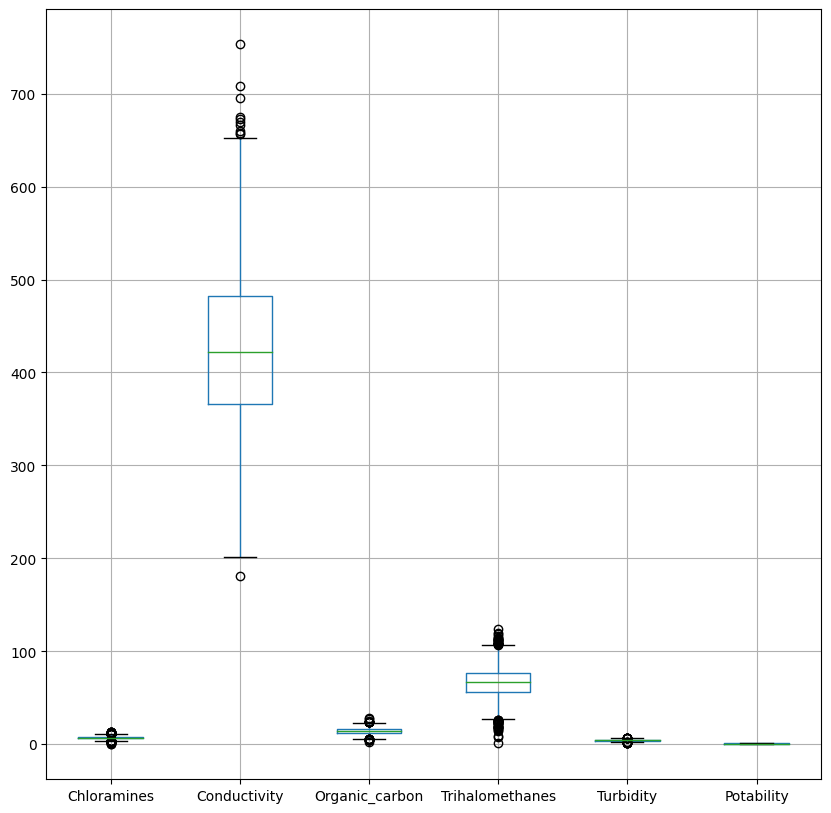

In [59]:
#plt.figure(figsize = (10,10))
remove = ['ph', 'Hardness', 'Solids']
water_data.drop(columns=remove).boxplot(figsize=(10,10))

In [60]:
%matplotlib inline

In [ ]:
sns.set_theme(style="darkgrid")
iris = sns.load_dataset("water_data")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_wi",
    y="sepal_length",
    hue="Potability",
    thresh=.1,
)

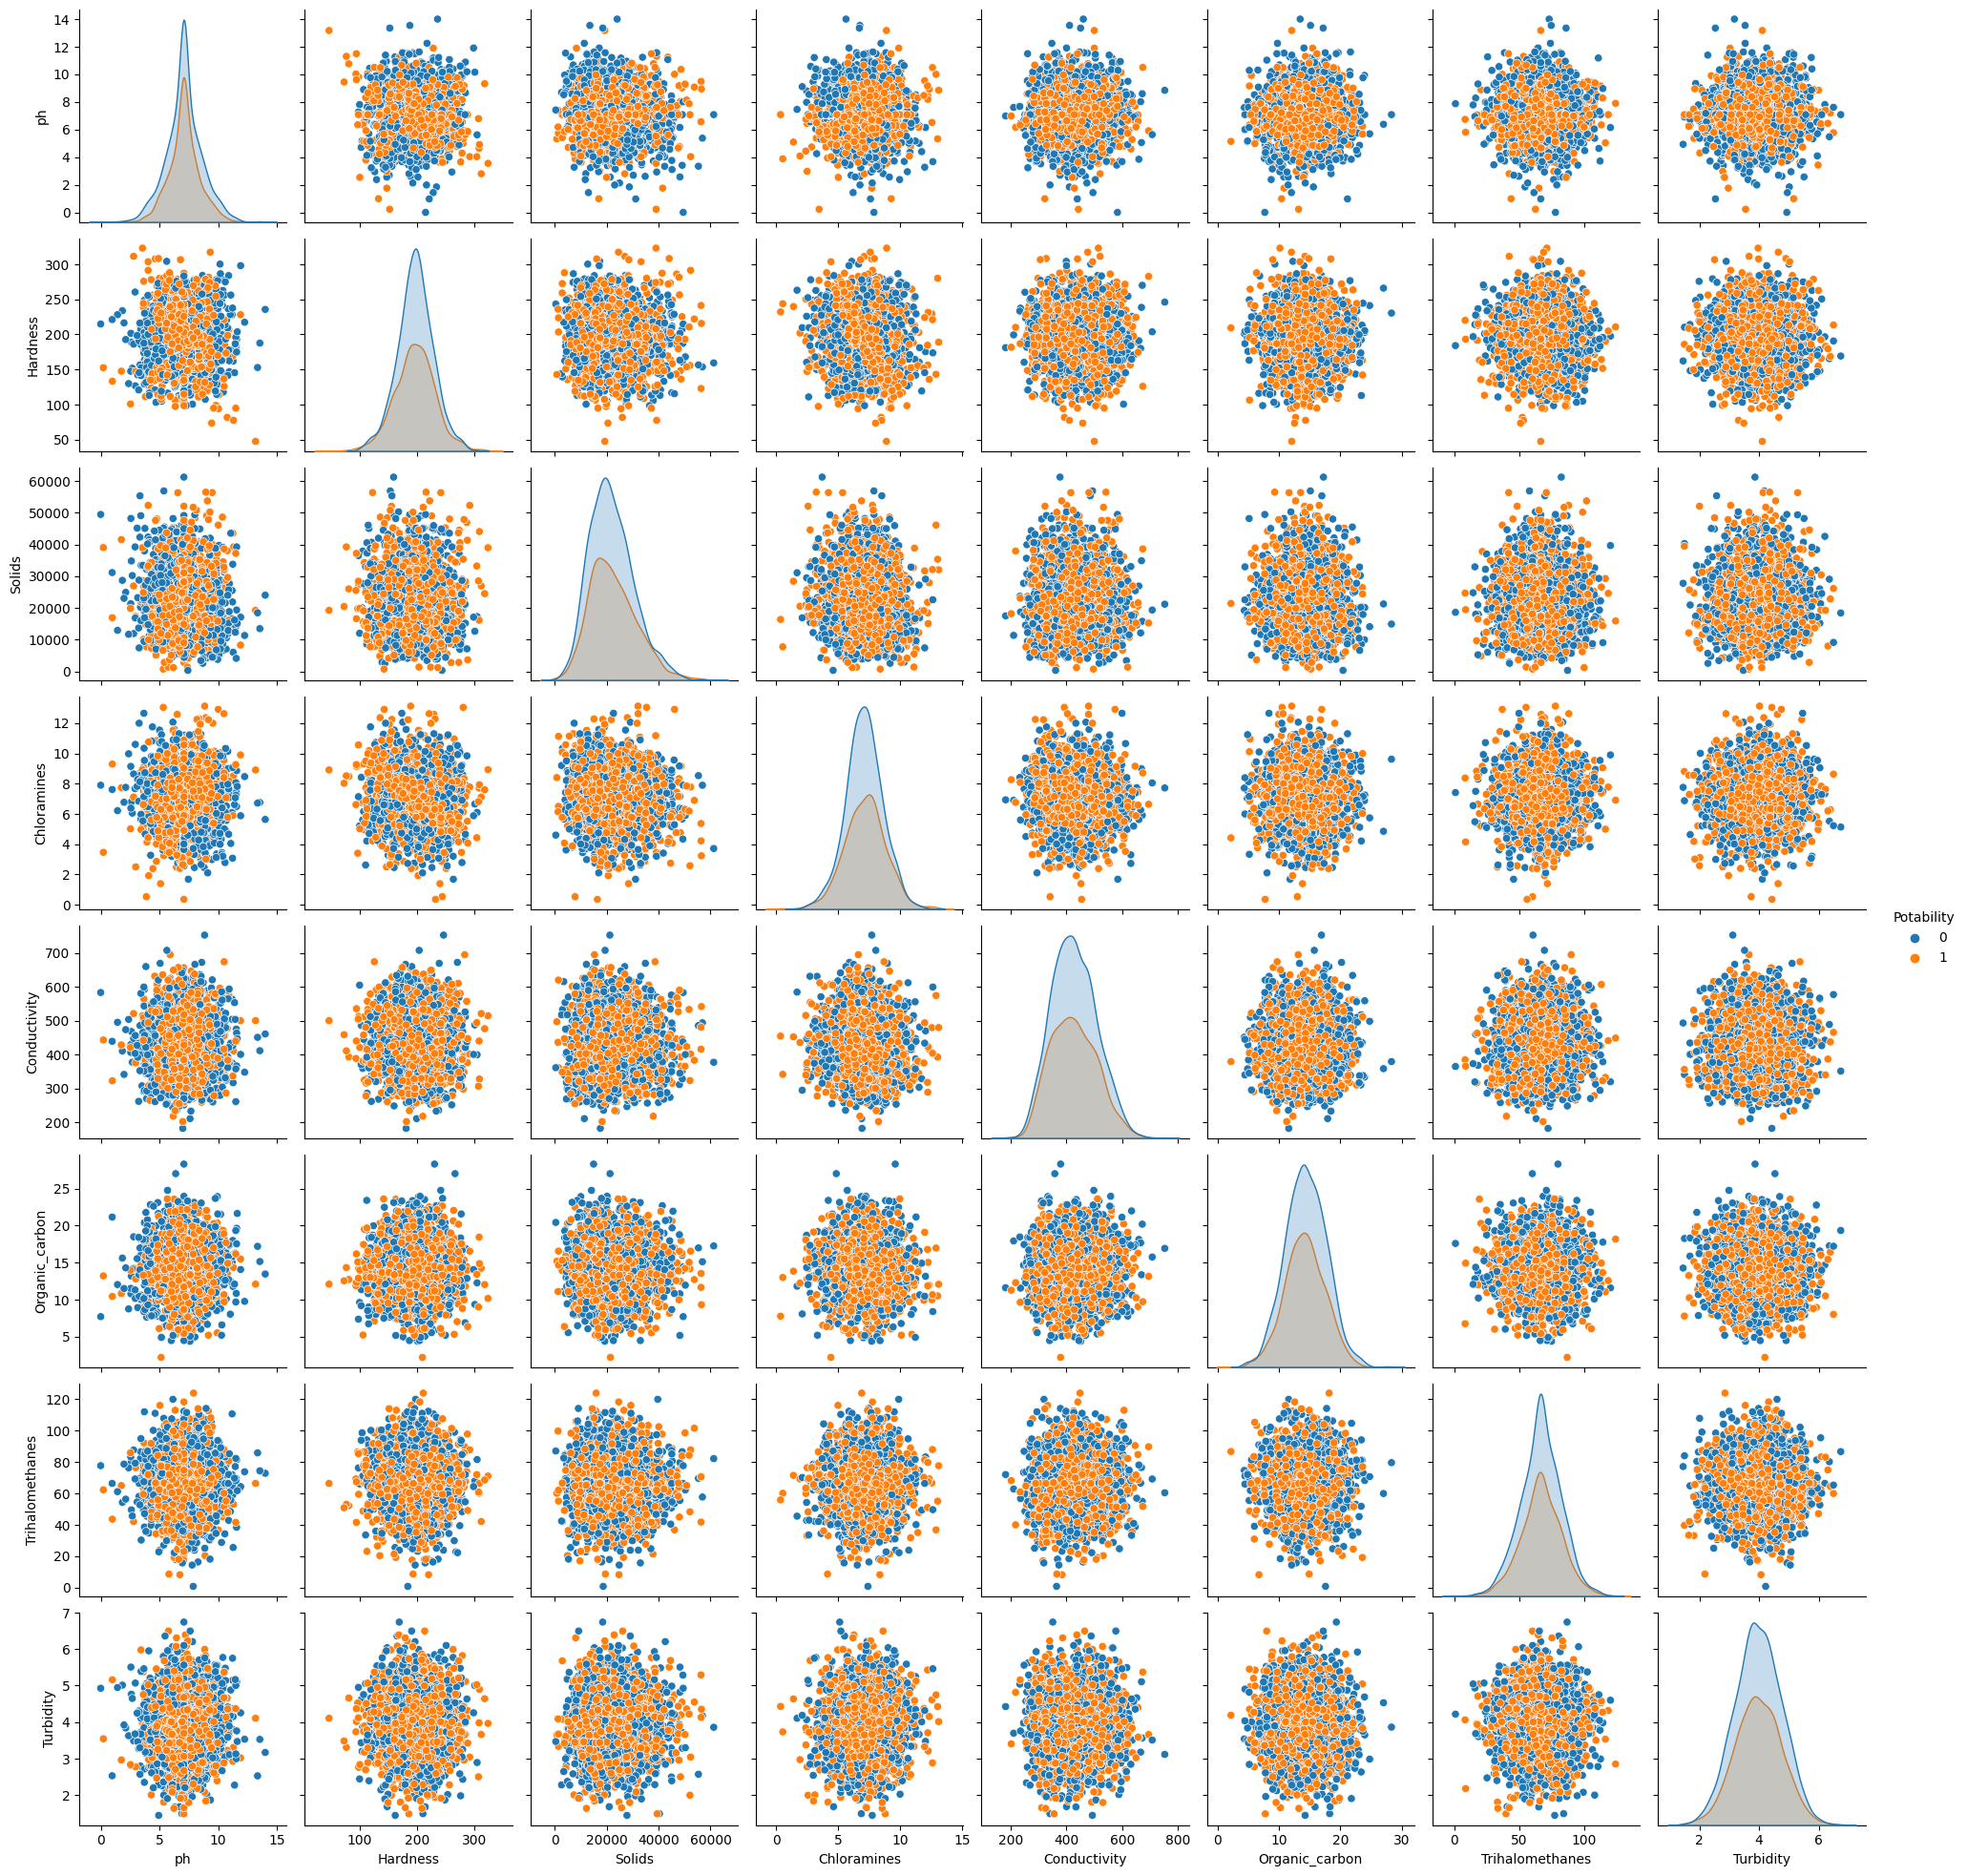

In [61]:
sns.pairplot(data = water_data,hue= "Potability")

## Analise de Desbalanceamento 


In [62]:
round((water_data.Potability.value_counts()/water_data.shape[0])*100)

0    61.0
1    39.0
Name: Potability, dtype: float64

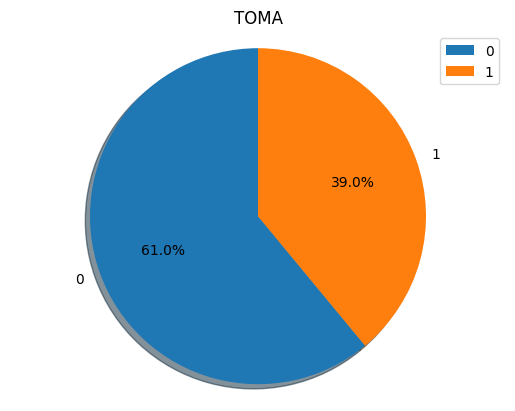

In [63]:
labels = '0', '1'
sizes = round((water_data.Potability.value_counts()/water_data.shape[0])*100)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("TOMA")
plt.legend() #["blue", "orange"], loc ="lower right"
plt.show()

## Normalização 

In [64]:
print(water_data.Potability.value_counts())
print(water_data.shape)

0    1998
1    1278
Name: Potability, dtype: int64
(3276, 9)


In [65]:
X = water_data.drop(columns = ["Potability"])
y = water_data.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42) 

In [66]:
print('Shape de X: ',X_train.shape)
print('Tamanho de y:',len(y_train), end='\n\n')

print('Values counts de y:\n',y_train.value_counts(), sep='', end='\n\n')
print('Quant dados faltantes:',y_train.isnull().sum())

Shape de X:  (2620, 8)
Tamanho de y: 2620

Values counts de y:
0    1586
1    1034
Name: Potability, dtype: int64

Quant dados faltantes: 0


In [67]:
print('Shape de X: ',X_test.shape)
print('Tamanho de y:',len(y_test), end='\n\n')

print('Values counts de y:\n',y_test.value_counts(), sep='', end='\n\n')
print('Quant dados faltantes:',y_test.isnull().sum())

Shape de X:  (656, 8)
Tamanho de y: 656

Values counts de y:
0    412
1    244
Name: Potability, dtype: int64

Quant dados faltantes: 0


In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [69]:
print('Shape de X: ',X_train_norm.shape)
print('Tamanho de y:',len(y_train), end='\n\n')

print('Values counts de y:\n',y_train.value_counts(), sep='', end='\n\n')
print('Quant dados faltantes:',y_train.isnull().sum())

Shape de X:  (2620, 8)
Tamanho de y: 2620

Values counts de y:
0    1586
1    1034
Name: Potability, dtype: int64

Quant dados faltantes: 0


In [70]:
print('Shape de X: ',X_test_norm.shape)
print('Tamanho de y:',len(y_test), end='\n\n')

print('Values counts de y:\n',y_test.value_counts(), sep='', end='\n\n')
print('Quant dados faltantes:',y_test.isnull().sum())

Shape de X:  (656, 8)
Tamanho de y: 656

Values counts de y:
0    412
1    244
Name: Potability, dtype: int64

Quant dados faltantes: 0


In [76]:
train_df = pd.DataFrame(X_train_norm, columns=list(X.columns))
train_df['label'] = y_train.to_list()
train_df.to_csv('data/train_normalized.csv')
train_df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,label
0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104,0
1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829,0
2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183,0
3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584,0
4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260,0
...,...,...,...,...,...,...,...,...,...
2615,-1.983229,0.366111,-0.029081,-0.794690,-1.994638,-0.918494,-1.241751,0.812639,1
2616,0.482890,-0.966755,0.389467,0.478776,-0.344453,0.318363,0.002472,0.333916,1
2617,-0.312761,-0.297420,1.004419,0.375135,-1.177037,-0.132780,1.287286,-0.602449,0
2618,1.159353,0.662635,-0.665997,0.177994,-0.460730,0.640193,-1.215345,0.403374,0


In [78]:
teste_df = pd.DataFrame(data=X_test_norm,columns=list(X.columns))
teste_df['label']= y_test.to_list()
teste_df.to_csv('data/teste_normalized.csv')